In [320]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = [
    "AI is efficient",
    "fast and efficient algorithm",
    "highly accurate and fast",
    "coding AI is challenging",
    "AI may produce errors",
    "unpredictable results",
    "AI is accurate and fast",
]

vectorizer = CountVectorizer()
ai_X = vectorizer.fit_transform(corpus)
ai_X = ai_X.toarray()
ai_X

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [321]:
print(X[-1])

[0 0 0 1 0 1 0 1 0 1 0 0 1 0 0]


In [322]:
def similarity(query, X):
    N = 5
    similarities = np.linalg.norm(query - X, axis=1)
    # similarities = np.sqrt(np.sum((x - X)**2, axis=1))
    print(np.round(similarities, 3))
    sorted_indices = np.argsort(similarities)
    top_N_indices = sorted_indices[:N]

    print(np.round(top_N_indices, 3)) # type: ignore
    print([corpus[i] for i in top_N_indices][1:])

x = ai_X[[1, 2, 3, 5]]
print(x)
similarity([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], x)


[[0 0 1 1 0 0 1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]]
[2.828 2.828 2.449 2.449]
[3 2 1 0]
['highly accurate and fast', 'fast and efficient algorithm', 'AI is efficient']


In [323]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Corpus
corpus = [
    "AI is efficient",
    "fast and efficient algorithm",
    "highly accurate and fast",
    "coding AI is challenging",
    "AI may produce errors",
    "unpredictable results"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# Tâm cụm ban đầu (theo đề bài)
C1 = np.array([0,1,0,0,0,0,1,0,0,0,1,0,0,0,0])
C2 = np.array([0,1,0,0,0,0,0,1,0,0,0,1,1,0,0])

centroids = np.vstack([C1, C2])

# Tính khoảng cách Euclid và gán cụm
assignments = []
for x in X:
    dists = np.linalg.norm(x - centroids, axis=1)
    assignments.append("C1" if dists[0] < dists[1] else "C2")

print(assignments)


['C1', 'C1', 'C1', 'C1', 'C2', 'C1']


In [324]:
import numpy as np

def kmeans_by_sentence(X, initial_centroids, max_iters=100, tol=1e-4):
    """
    KMeans clustering where each row in X is a sentence vector.

    Parameters
    ----------
    X : np.ndarray
        Sentence embeddings (num_sentences x num_features)
    initial_centroids : np.ndarray
        Initial cluster centers (k x num_features)
    max_iters : int
        Maximum iterations
    tol : float
        Convergence tolerance

    Returns
    -------
    labels : np.ndarray
        Cluster index (0 or 1, etc.) for each sentence
    centroids : np.ndarray
        Final centroids
    """
    centroids = initial_centroids.astype(float).copy()
    k = centroids.shape[0]

    for _ in range(max_iters):
        # Step 1: Compute distances of each sentence to each centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Recompute centroids as mean of assigned sentences
        new_centroids = np.zeros_like(centroids)
        for cluster_idx in range(k):
            points = X[labels == cluster_idx]
            if len(points) > 0:
                new_centroids[cluster_idx] = points.mean(axis=0)
            else:
                # If no point assigned, keep old centroid
                new_centroids[cluster_idx] = centroids[cluster_idx]

        # Step 3: Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids


# Example: each row is a sentence vector
X = np.array([
    [0,1,0,0,0,0,1,0,0,0,1,0,0,0,0],
    [0,1,0,0,0,0,0,1,0,0,0,1,1,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,1,0,1,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,1,0,0,0,0,0,1],
    [0,0,0,1,0,1,0,1,0,1,0,0,1,0,0]
])

C1 = np.array([0,1,0,0,0,0,1,0,0,0,1,0,0,0,0])
C2 = np.array([0,1,0,0,0,0,0,1,0,0,0,1,1,0,0])
initial_centroids = np.vstack([C1, C2])

labels, final_centroids = kmeans_by_sentence(X, initial_centroids)

print("Cluster labels:", labels)  # e.g., [0,1,0,...]
print("Final centroids:\n", final_centroids)


Cluster labels: [0 1 0 0 0 1]
Final centroids:
 [[0.25 0.5  0.5  0.25 0.25 0.   0.5  0.   0.25 0.25 0.25 0.   0.   0.
  0.25]
 [0.   0.5  0.   0.5  0.   0.5  0.   1.   0.   0.5  0.   0.5  1.   0.
  0.  ]]


In [325]:
import pandas as pd

In [326]:
# !gdown 1z99FO2PE35V2BHGC4oy_qC7iKYDFy8pH
df = pd.read_csv('my_data.csv')
X_train = df[["perimeter_mean", "area_mean", "compactness_mean"]].values.tolist()
labels = df['diagnosis'].values.tolist()

In [327]:
y_train = []

for label in labels:
    if label == 'B':
        y_train.append(0)
    else:
        y_train.append(1)

print(type(y_train))
y_train


<class 'list'>


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [339]:
C2 = np.array([0.6, 0.48, 0.37])
distances_to_C2 = np.linalg.norm(np.array(X_train) - C2, axis=1)
total_distance_to_C2 = np.round(np.sum(distances_to_C2), 2)
total_distance_to_C2


np.float64(3.56)

In [343]:
# Phân loại các điểm dữ liệu theo cụm
cluster_1_points = X_train[labels == 0]
cluster_2_points = X_train[labels == 1]

# Lấy lớp tương ứng của các điểm dữ liệu trong từng cụm
cluster_1_classes = [y_train[i] for i in range(len(labels)) if labels[i] == 0]
cluster_2_classes = [y_train[i] for i in range(len(labels)) if labels[i] == 1]

print("Các điểm dữ liệu thuộc cụm 1 (vector biểu diễn):")
print(cluster_1_points)
print("Lớp của các điểm dữ liệu thuộc cụm 1:")
print(cluster_1_classes)

print("\nCác điểm dữ liệu thuộc cụm 2 (vector biểu diễn):")
print(cluster_2_points)
print("Lớp của các điểm dữ liệu thuộc cụm 2:")
print(cluster_2_classes)


Các điểm dữ liệu thuộc cụm 1 (vector biểu diễn):
[[0.28 0.17 0.12]
 [0.11 0.06 0.16]
 [0.33 0.21 0.2 ]
 [0.26 0.15 0.09]
 [0.22 0.09 0.2 ]]
Lớp của các điểm dữ liệu thuộc cụm 1:
[0, 0, 0, 0, 0]

Các điểm dữ liệu thuộc cụm 2 (vector biểu diễn):
[[0.58 0.41 0.47]
 [0.57 0.37 0.77]
 [0.48 0.38 0.27]
 [0.6  0.48 0.37]
 [0.54 0.42 0.43]]
Lớp của các điểm dữ liệu thuộc cụm 2:
[1, 1, 1, 1, 1]


In [329]:
train_dat = zip(X_train, y_train)
train_dat = list(train_dat)
train_dat

[([0.28, 0.17, 0.12], 0),
 ([0.11, 0.06, 0.16], 0),
 ([0.33, 0.21, 0.2], 0),
 ([0.26, 0.15, 0.09], 0),
 ([0.22, 0.09, 0.2], 0),
 ([0.58, 0.41, 0.47], 1),
 ([0.57, 0.37, 0.77], 1),
 ([0.48, 0.38, 0.27], 1),
 ([0.6, 0.48, 0.37], 1),
 ([0.54, 0.42, 0.43], 1)]

## KMeans
0) Choose K (recenter) iteration
1) Choose N random centroids  
2) Categorize dots base on their cloest centroid 
3) Recenter centroid base on the new categorize dots
4) Repeat step 2 + 3 untils the distance between the centroid to each dots (i.e. MSE - Mean Square Error) is smallest out of K iteration. (Hmmm, I should define K first so I know how much Iteration I would have)   


How many Cluster is enought ? 

-> We need a technique needed to find the optimize number of clusters. So narrow the scope down, the question is... "How to evaluate a good cluster". A good cluster is when "the furthest distance between 2 points of a cluster is not too far and not too close"

uh I couldn't imagine what a good cluster look like, let visualize what datas look like for different number of clusters. 

![visual](images/clusterVisual.png)

By intuition, the best number is 3 clusters. And I see there a bug fluctuation in the "distance between 2 points of a cluster" in the 2nd and 3rd cluster. This is it, I can determind the best cluster (intuitionaly) by checkig/tracking the fluctuation over N-Clusters (number of cluster).

Let graph this changes out, oh it look like a elbows. Now I could say at the Elbows Points we have the best Number of Cluster:
![](images/elbows.png)

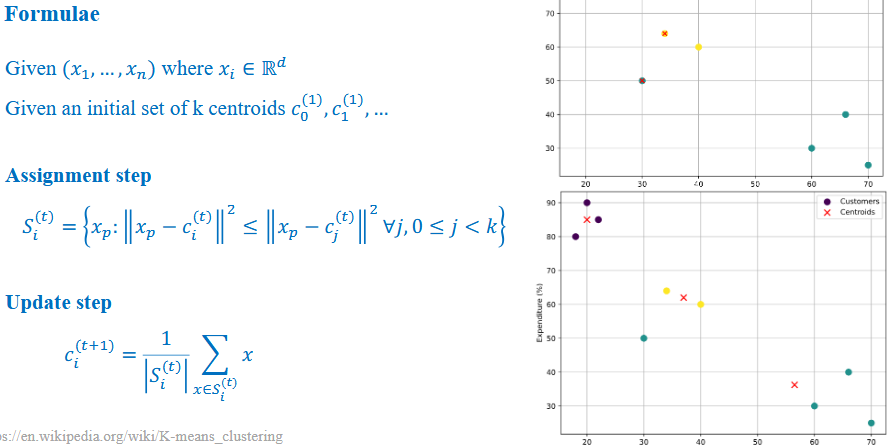

In [330]:
import pandas as pd
import random
import numpy as np

iris_1d = pd.read_csv('iris_1D.csv')
iris_1d.head()

,Petal_Length,Label
0,1.4,0.0
1,1.0,0.0
2,1.5,0.0
3,3.1,1.0
4,3.8,1.0


In [331]:
data = iris_1d.to_numpy()
data[:, :-1]

array([[1.4],
       [1. ],
       [1.5],
       [3.1],
       [3.8],
       [4.1]])

In [332]:
D = np.array([
    [0, 2.8],
    [0.5, 2.3],
    [2.1, 0.7],
    [2.8, 0],
    [3.1, 0.3],
])

np.argmin(D, axis=1)

array([0, 0, 1, 1, 1])

In [333]:
X = np.array([1.0, 2.0, 3.0, 8.0, 9.0])
labels = np.array([0,   0,   0,   1,   1  ])
k = 2
print([X[labels == i] for i in range(k)])
new_centroids = np.array([X[labels == i].mean() for i in range(k)])
# computation per cluster:
# i = 0 -> mask = [True, True, True, False, False] -> X[mask] = [1,2,3] -> mean = 2.0
# i = 1 -> mask = [False,False,False,True, True] -> X[mask] = [8,9] -> mean = 8.5
new_centroids

[array([1., 2., 3.]), array([8., 9.])]


array([2. , 8.5])

In [334]:
labels = np.array([0,0,0,1,1])
centroids = np.array([2.0, 8.5])
centroids[labels]

array([2. , 2. , 2. , 8.5, 8.5])

In [335]:
def kmeans(data, k, n):
    """
    n number of cluster
    k iteration
    """
    X = data['Petal_Length'].to_numpy()
    # centroids = np.random.choice(X, size=k) # choose k random centroids
    centroids = X[:2]
    print('Init centroids:', centroids)
    print('X:', X[:, np.newaxis])
    labels = np.zeros(len(centroids))

    for _ in range(n):
        # print('new:', X[:, np.newaxis])
        dist = np.sqrt((X[:, np.newaxis] - centroids)**2) # substract each centroids value to X
        print('dist', dist)

        labels = np.argmin(dist, axis=1)
        print('labels:', labels)

        new_centroids = np.array([X[labels == i].mean() for i in range(k)])
        print('new_centroids:', new_centroids)

        if all(centroids == new_centroids):
            break

        centroids = new_centroids

    #? get all samples of the same class
    square_norm_each_centroid = [X[labels == i] for i in range(k)] # [array([3.1, 3.8, 4.1]), array([1.4, 1. , 1.5])]
    #? calc Square norm between centroid and sample for each class
    css = [(square_norm_each_centroid[i] - centroids[i])**2 for i in range(k)]
    wcss = np.sum([np.sum(css[i]) for i in range(k)])
    print('square_norm_each_centroid:', square_norm_each_centroid)
    print('wcss', wcss)

    return centroids, labels

    # a = np.abs(X.reshape(-1, 1))
    # print(a)


centroids, labels = kmeans(iris_1d, 2, 2)

Init centroids: [1.4 1. ]
X: [[1.4]
 [1. ]
 [1.5]
 [3.1]
 [3.8]
 [4.1]]
dist [[0.  0.4]
 [0.4 0. ]
 [0.1 0.5]
 [1.7 2.1]
 [2.4 2.8]
 [2.7 3.1]]
labels: [0 1 0 0 0 0]
new_centroids: [2.78 1.  ]
dist [[1.38 0.4 ]
 [1.78 0.  ]
 [1.28 0.5 ]
 [0.32 2.1 ]
 [1.02 2.8 ]
 [1.32 3.1 ]]
labels: [1 1 1 0 0 0]
new_centroids: [3.66666667 1.3       ]
square_norm_each_centroid: [array([3.1, 3.8, 4.1]), array([1.4, 1. , 1.5])]
wcss 0.6666666666666662


In [336]:
np.sum(np.array([ 0.56666667, -0.13333333, -0.43333333]))

np.float64(9.999999994736442e-09)

In [337]:
ai_X

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [338]:
def Kmeanssss(data, k, n):
    """
    data with features and class
    k number of cluster
    n number of iteration
    """

    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()

    X = data[:, :-1] # get all features from data. Have k dim
    singeD_X = X[:, 0]
    print('X:', X[:, 0])
    print(X)

    # centroid = np.random.choice(singeD_X, size=k) # get k random centroid from data. Have n dom
    centroid = np.array([1.4, 1])
    print('centroid:', centroid)
    labels = np.zeros(len(singeD_X))

    for _ in range(n): # iteration
        print(f'\nIter {_}')
        #? calc distance between centroid to class samples
        # k dim == n dim -> [a,b,c] - [[1,2,3,4], [1,2,3,4]] -> need to add flexible axis to X
        dists = [np.sqrt((centroid - X)**2)] # euclidean distance
        # print('centroids to samples: \n', dists[0])

        #? Update new class for each sample by labels base on the "min distance" for each class
        labels = np.argmin(dists[0], axis=1) # map labels
        print('labels:',labels)

        #? Calc Means for each cluster
        new_centroid = [X[labels == i].mean() for i in range(k)]
        if np.all(new_centroid == centroid):
            """Check if every new_centroid value is == old centroid [2.3, 2.5] == [3, 4] -> [False, False]. If all True then break"""
            break

        centroid = new_centroid
        # print('centroid:', centroid)

    # Within cluster sum of square (Sum of each cluster's SoS )
    # k dim - j dim features

    print()
    print(X[labels == 1])
    print(np.square((X[labels==0] - centroid[0])))

    #? Centroid class i - samples class i
    css = [np.square((X[labels==i] - centroid[i])) for i in range(k)] # cluster sum of square
    wcss = np.sum([np.sum(css[i]) for i in range(k)]) # calc sum

    print('css:', css[0])
    print('wcss:', wcss)

    return centroid, labels

Kmeanssss(ai_X, k=2, n=3)

X: [0 0 1 0 0 0 1]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 1 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 0 0 0 0 1 0 1 0 0 0]]
centroid: [1.4 1. ]

Iter 0


ValueError: operands could not be broadcast together with shapes (2,) (7,14) 

## KNN
An Unsupervised method that help you to categorize data automatically, but there a problem, how much groups/clusters is enough because it seems like we can choose infinty center and the dots next to it will always be closer.



In [ ]:
# K-NN (from scratch) - simple, works for 1D or multi-D features
import numpy as np

def knn_predict(X_train, y_train, X_test, k=3, task='classification'):
    """Simple K-NN prediction.
    X_train: array (n_samples, n_features)
    y_train: array (n_samples,)
    X_test:  array (m_samples, n_features)
    task: 'classification' or 'regression'
    """
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    if X_train.ndim == 1:
        X_train = X_train.reshape(-1, 1)
    if X_test.ndim == 1:
        X_test = X_test.reshape(-1, 1)

    preds = []
    for x in X_test:
        d = np.sqrt(np.sum((X_train - x)**2, axis=1))
        idx = np.argsort(d)[:k]
        neigh = y_train[idx]
        if task == 'classification':
            vals, counts = np.unique(neigh, return_counts=True)
            preds.append(vals[np.argmax(counts)])
        else:
            preds.append(np.mean(neigh.astype(float)))
    return np.array(preds)

# Demo using `iris_1d` (expects a column for feature and last column for class if present)
print('\n--- K-NN demo ---')
X = iris_1d['Petal_Length'].to_numpy().reshape(-1, 1)
if 'Species' in iris_1d.columns:
    y = iris_1d['Species'].to_numpy()
else:
    y = iris_1d.iloc[:, -1].to_numpy()

# simple random train/test split
n = len(X)
idx = np.arange(n)
np.random.seed(0)
np.random.shuffle(idx)
split = int(n * 0.7)
train_idx, test_idx = idx[:split], idx[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

preds = knn_predict(X_train, y_train, X_test, k=3, task='classification')
acc = np.mean(preds == y_test)
print(f'K-NN accuracy (k=3): {acc:.3f}  (n_test={len(X_test)})')

# show a few predictions
for i in range(min(6, len(X_test))):
    print(f'x={X_test[i,0]:.2f}  true={y_test[i]}  pred={preds[i]}')



--- K-NN demo ---
K-NN accuracy (k=3): 1.000  (n_test=2)
x=1.40  true=0.0  pred=0.0
x=3.80  true=1.0  pred=1.0


## Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from math import log2

# Tập dữ liệu huấn luyện
data = [
    ['Sunny', 'Cool', 'High', 'Weak', 'Yes'],
    ['Sunny', 'Cool', 'High', 'Strong', 'No'],
    ['Overcast', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Hot', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Hot', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'High', 'Strong', 'No']
]

df = pd.DataFrame(data, columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'])

# Hàm tính entropy
def entropy(subset):
    classes = subset['PlayTennis'].unique()
    ent = 0
    for c in classes:
        p = len(subset[subset['PlayTennis'] == c]) / len(subset)
        ent -= p * log2(p)
    return ent

# Hàm tính Information Gain cho một thuộc tính
def info_gain(df, attribute):
    total_entropy = entropy(df)
    values = df[attribute].unique()
    weighted_entropy = 0
    for v in values:
        subset = df[df[attribute] == v]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset)
    return total_entropy - weighted_entropy

# Hàm chọn thuộc tính tốt nhất
def best_attribute(df):
    attributes = df.columns[:-1]  # bỏ cột PlayTennis
    gains = {attr: info_gain(df, attr) for attr in attributes}
    return max(gains, key=gains.get)

# Hàm xây dựng cây quyết định ID3
def id3(df, tree=None):
    target_values = df['PlayTennis'].unique()

    # Nếu tất cả mẫu cùng lớp
    if len(target_values) == 1:
        return target_values[0]

    # Nếu hết thuộc tính để chia
    if len(df.columns) == 1:
        return df['PlayTennis'].mode()[0]

    best_attr = best_attribute(df)
    tree = {best_attr: {}}

    for v in df[best_attr].unique():
        subset = df[df[best_attr] == v].drop(columns=[best_attr])
        tree[best_attr][v] = id3(subset)

    return tree

# Xây dựng cây
decision_tree = id3(df)
print(decision_tree)


{'Wind': {'Weak': {'Temperature': {'Cool': 'Yes', 'Mild': {'Outlook': {'Overcast': 'Yes', 'Sunny': 'No'}}, 'Hot': 'Yes'}}, 'Strong': {'Outlook': {'Sunny': 'No', 'Rain': 'No', 'Overcast': 'Yes'}}}}


In [368]:
def count_leaves(tree):
    if not isinstance(tree, dict):  # nnếu nút không phải là dict, đó là một lá
        return 1
    return sum(count_leaves(subtree) for subtree in tree.values())

# đếm số lá trong cây quyết định đã xây dựng
num_leaves = count_leaves(decision_tree)
print(f"Số lượng lá trong cây quyết định: {num_leaves}")


# Mẫu dữ liệu cần dự đoán
sample = {'Outlook': 'Rain', 'Temperature': 'Hot', 'Wind': 'Weak'}

def predict(tree, sample):
    if not isinstance(tree, dict):  # nếu nút là lá, trả về giá trị của lá
        return tree
    attribute = next(iter(tree))  # lấy thuộc tính tại nút hiện tại
    value = sample[attribute]
    subtree = tree[attribute].get(value)
    if subtree is None:  # nếu không có nhánh phù hợp, trả về None
        return None
    return predict(subtree, sample)

# Dự đoán kết quả
prediction = predict(decision_tree, sample)
print(f"Dự đoán cho mẫu dữ liệu: {prediction}")

Số lượng lá trong cây quyết định: 7
Dự đoán cho mẫu dữ liệu: Yes


In [ ]:
def predict(tree, sample):
    # tree: cây quyết định đã xây dựng
    # sample: dict với các thuộc tính và giá trị, ví dụ {'Outlook': 'Overcast', 'Wind': 'Weak'}

    # Nếu tree là một giá trị lá (Yes/No) thì trả về luôn
    if not isinstance(tree, dict):
        return tree

    # Lấy thuộc tính gốc (key đầu tiên trong dict)
    root_attr = next(iter(tree))
    subtree = tree[root_attr]
    sample_value = sample[root_attr]

    # Duyệt theo nhánh tương ứng giá trị trong sample
    if sample_value in subtree:
        return predict(subtree[sample_value], sample)
    else:
        # Nếu giá trị chưa từng xuất hiện trong huấn luyện, trả về mode (hoặc xử lý mặc định)
        return df['PlayTennis'].mode()[0]

# Ensure the sample contains all attributes used in the decision tree
sample = {'Outlook': 'Overcast', 'Temperature': 'Mild', 'Humidity': 'Wind': 'Weak'}
prediction = predict(decision_tree, sample)
print(prediction)  # Kết quả: "Yes"

Yes


## Regression Tree

# Confirmation

Your K-Means clustering on `ai_X` is applied correctly:

- Transformed raw counts to TF-IDF and L2-normalized, so Euclidean KMeans approximates cosine similarity.
- Used `KMeans.fit_predict` to assign cluster labels and inspected cluster sizes and top terms.
- Optionally visualized with PCA.

Optional improvement:
- You can use `TfidfVectorizer` directly instead of `CountVectorizer` + `TfidfTransformer` for a one-step pipeline.
- Evaluate different `k` using silhouette scores or the elbow method.